# Preisbeschreibung der Wohnungen in Boston

[Boston Housing Jupyter Notebook Regression](https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_regression_analysis.ipynb)

[Boston Housing Jupyter Notebook Deep Learning](https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_deeplearning_regression.ipynb)

## Datensatz laden

In [1]:
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [2]:
print(f"Shape of x_train is {x_train.shape}")
print(f"Shape of x_test is {x_test.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of x_train is (404, 13)
Shape of x_test is (102, 13)
Shape of y_train is (404,)
Shape of y_test is (102,)


## Datensatz visualisieren

[Dokumentation zu Boston Housing Datensatz - Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)

[Dokumentation zu den Attributen](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)

| Feature | Description                                              |
|--------|----------------------------------------------------------|
| CRIM    | Per capita crime rate by town                           |
| ZN      | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| INDUS   | Proportion of non-retail business acres per town        |
| CHAS    | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX     | Nitric oxides concentration (parts per 10 million)      |
| RM      | Average number of rooms per dwelling                    |
| AGE     | Proportion of owner-occupied units built prior to 1940  |
| DIS     | Weighted distances to five Boston employment centres   |
| RAD     | Index of accessibility to radial highways               |
| TAX     | Full-value property-tax rate per 10,000 Dollars                |
| PTRATIO | Pupil-teacher ratio by town                             |
| B       | 1000(Bk - 0.63) where Bk is the proportion of blacks by town |
| LSTAT   | % lower status of the population                        |
| MEDV    | Median value of owner-occupied homes in $1000's         |

![Missmatch Attributes](./images/missmatch_attributes.png)

> Vermutung: Attribut 'B' wurde entfernt

In [3]:
import pandas as pd
x_train_df = pd.DataFrame(x_train, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

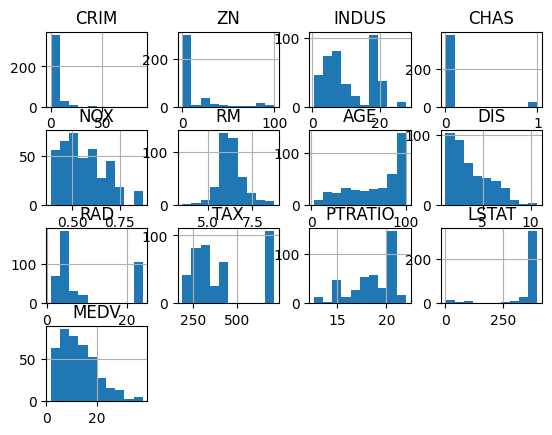

In [4]:
x_train_df.hist()

## Zielvariable

Die letzte Spalte stellt den Median der Eigentumspreise in $1000 Dolar der einzelnen Teilstädte oder Suburbs von Boston Agglo dar.

In [5]:
y_train_df = pd.DataFrame(y_train)
y_train_df

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


## Attribute normalisieren mit StandardScaler

In [12]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [13]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## Modell definieren

In [14]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

/Users/yhutter/GitRepos/fhgr-dl/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

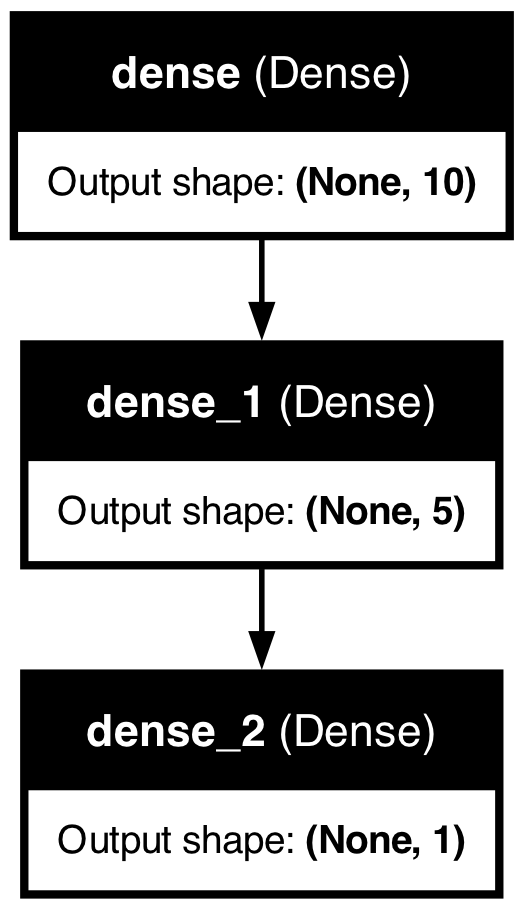

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

## Model kompilieren

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

## Model trainieren

In [18]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.20)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 550.8399 - mae: 21.7539 - val_loss: 644.9578 - val_mae: 23.7136
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 569.8696 - mae: 22.2182 - val_loss: 639.3616 - val_mae: 23.5989
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 532.5145 - mae: 21.3536 - val_loss: 633.9163 - val_mae: 23.4830
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536.9533 - mae: 21.5780 - val_loss: 628.0765 - val_mae: 23.3565
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 576.6593 - mae: 22.0108 - val_loss: 621.6680 - val_mae: 23.2127
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 537.7570 - mae: 21.4683 - val_loss: 614.5205 - val_mae: 23.0520
Epoch 7/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 578.1583 - mae: 21.8780 - val_loss: 606.3762 - val_mae: 22.8682
Epoch 8/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 525.4963 - mae: 21.2634 - val_loss: 597.2306 - val_mae: 22.6628
Epoch 9/500
11/1

In [19]:
history.history['mae'][499]

1.9678473472595215

## Model evaluieren

Modell MAE (Mean Absolute Error)


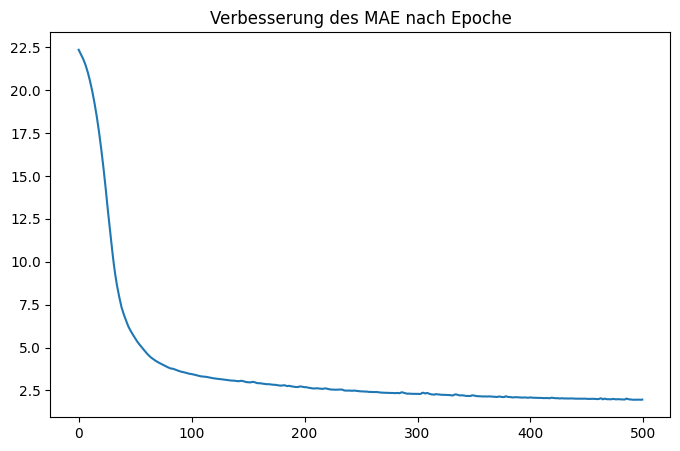

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
print("Modell MAE (Mean Absolute Error)")
pd.DataFrame(history.history)['mae'].plot(figsize=(8, 5))
plt.title("Verbesserung des MAE nach Epoche")
plt.show()

In [22]:
result = model.evaluate(x_test, y_test, batch_size=32)
print("test loss, test mae:", result)
print()

for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 13.4268 - mae: 2.6090
test loss, test mae: [17.16561508178711, 2.8770923614501953]

loss — -> 17.16561508178711
compile_metrics — -> 2.8770923614501953


## Prediction

In [24]:
import numpy as np

predict_data = np.array([0.63796, 0.00, 8.140, 0, 0.5380, 6.0960, 84.50, 4.4619, 4, 307.0, 21.00, 380.02, 10.26]) # Zeile 15 aus dem Datensatz hat eine Zielvariable von 18.2
predict_data = scaler.transform(predict_data.reshape(1, -1))

predict_result = model.predict(predict_data)
print(f'Predicted result: {predict_result[0, 0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted result: 18.660860061645508
